# Data Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from karpiu.simulation import make_mmm_daily_data, make_adstock_matrix
from karpiu.utils import insert_events

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_STEPS = 365 * 3
COEFS = [0.03, 0.05, 0.028, 0.01, 0.03]
CHANNELS = ["tv", "radio", "social", "promo", "search"]
LOC = np.array([10000, 5000, 3000, 2000, 850])
SCALE = np.array([5000, 3000, 1000, 550, 500])
SCALABILITY = np.array([1.1, 0.75, 1.3, 1.5, 0.9])
SEED = 2022
START_DATE = "2019-01-01"

## Utils

### Simulating Adstock Matrix

In [4]:
adstock_matrix = make_adstock_matrix(
    n_steps=28,
    peak_step=np.array([10, 8, 5, 3, 2]),
    left_growth=np.array([0.05, 0.08, 0.1, 0.5, 0.75]),
    right_growth=np.array([-0.03, -0.6, -0.5, -0.1, -0.25]),
)

In [5]:
adstock_args = {
    "n_steps": 28,
    "peak_step": np.array([10, 8, 5, 3, 2]),
    "left_growth": np.array([0.05, 0.08, 0.1, 0.5, 0.75]),
    "right_growth": np.array([-0.03, -0.6, -0.5, -0.1, -0.25]),
}

In [6]:
adstock_matrix.shape

(5, 28)

## Data Simulations

### Non-Seasonal

In [7]:
seed = 2022
n_steps = 365 * 3
channels_coef = [0.01, 0.05, 0.045, 0.28, 0.03]
channels = ["promo", "radio", "search", "social", "tv"]
features_loc = np.array([10000, 5000, 3000, 2000, 850])
features_scale = np.array([5000, 3000, 1000, 550, 500])
scalability = np.array([1.1, 0.75, 1.3, 1.5, 0.9])
start_date = "2019-01-01"
adstock_args = {
    "n_steps": 28,
    "peak_step": np.array([10, 8, 5, 3, 2]),
    "left_growth": np.array([0.05, 0.08, 0.1, 0.5, 0.75]),
    "right_growth": np.array([-0.03, -0.6, -0.5, -0.1, -0.25]),
}
np.random.seed(seed)
df, scalability_df, adstock_df, event_cols = make_mmm_daily_data(
    channels_coef=channels_coef,
    channels=channels,
    features_loc=features_loc,
    features_scale=features_scale,
    scalability=scalability,
    n_steps=n_steps,
    start_date=start_date,
    adstock_args=adstock_args,
    country=None,
)

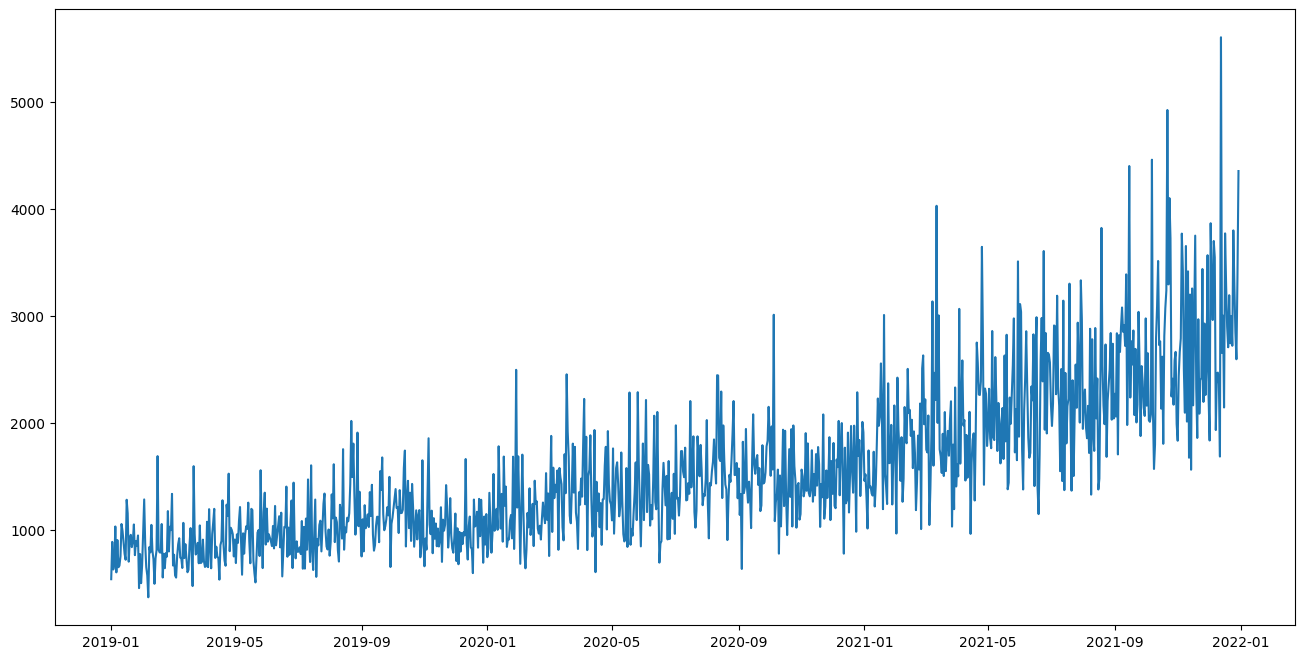

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(df["date"].values, df["sales"].values);

In [9]:
df.to_csv("resource/non-seasonal/df.csv", index=False)
scalability_df.to_csv("resource/non-seasonal/scalability_df.csv", index=False)
adstock_df.to_csv("resource/non-seasonal/adstock_df.csv")

### Seasonal

In [10]:
seed = 2023
n_steps = 365 * 3
channels_coef = [0.01, 0.05, 0.045, 0.28, 0.03]
channels = ["promo", "radio", "search", "social", "tv"]
features_loc = np.array([10000, 5000, 3000, 2000, 850])
features_scale = np.array([5000, 3000, 1000, 550, 500])
scalability = np.array([1.1, 0.75, 1.3, 1.5, 0.9])
start_date = "2019-01-01"
adstock_args = {
    "n_steps": 28,
    "peak_step": np.array([10, 8, 5, 3, 2]),
    "left_growth": np.array([0.05, 0.08, 0.1, 0.5, 0.75]),
    "right_growth": np.array([-0.03, -0.6, -0.5, -0.1, -0.25]),
}
np.random.seed(seed)
df, scalability_df, adstock_df, event_cols = make_mmm_daily_data(
    channels_coef=channels_coef,
    channels=channels,
    features_loc=features_loc,
    features_scale=features_scale,
    scalability=scalability,v
    n_steps=n_steps,
    start_date=start_date,
    adstock_args=adstock_args,
    with_weekly_seasonality=True,
    with_yearly_seasonality=True,
    country="US",
)

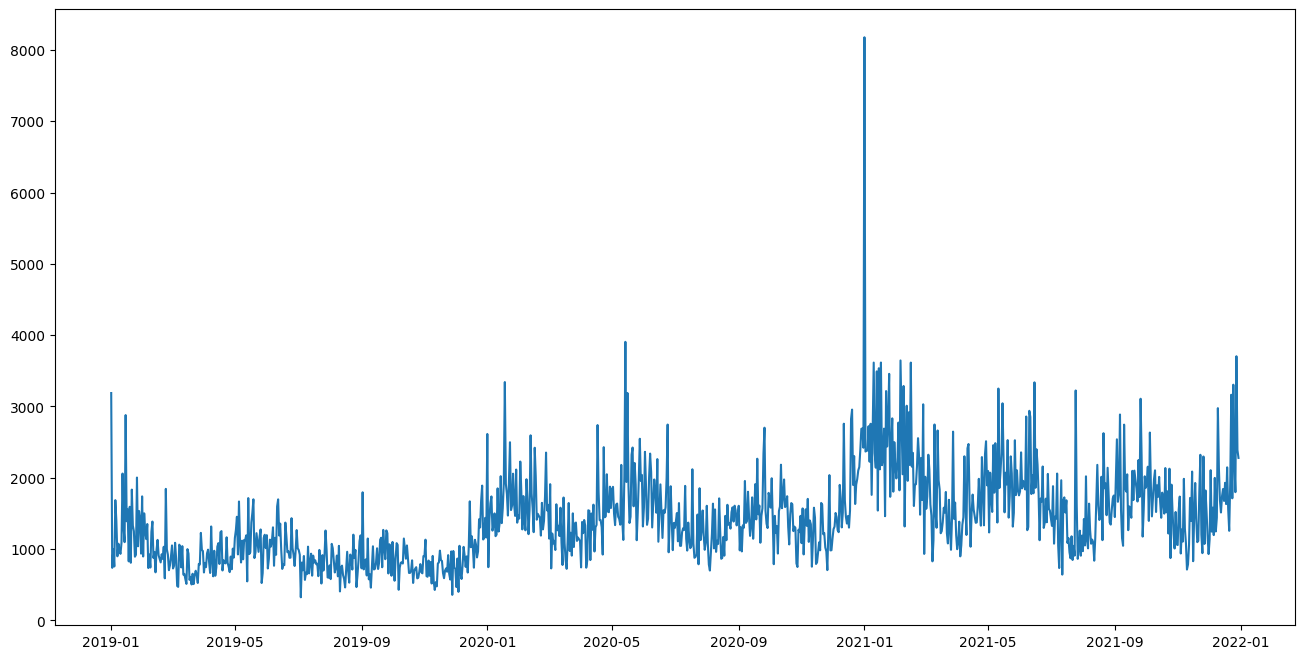

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(df["date"].values, df["sales"].values);

In [12]:
df.to_csv("resource/seasonal/df.csv", index=False)
scalability_df.to_csv("resource/seasonal/scalability_df.csv", index=False)
adstock_df.to_csv("resource/seasonal/adstock_df.csv")